# Обучение MNIST

In [1]:
import math
import numpy as np
from torch import nn
from torch.nn import init
from torch.nn.modules import loss
import torch

In [2]:
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [3]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline  

## Получение данных

In [4]:
train_dataset = datasets.MNIST(
    'data', 
    train=True, 
    download=True,    
    transform=ToTensor()
)
test_dataset = datasets.MNIST(
    'data', 
    train=False, 
    download=True,
    transform=ToTensor()
)

In [5]:
img, label = train_dataset[0]

In [6]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

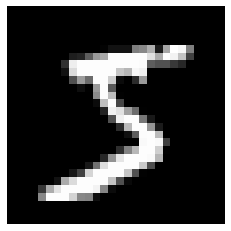

In [7]:
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [9]:
train_features, train_labels = next(iter(train_dataloader))

In [149]:
train_features.shape

torch.Size([16, 1, 28, 28])

In [150]:
train_labels.shape

torch.Size([16])

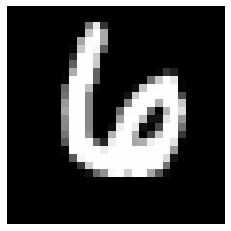

In [151]:
plt.axis("off")
plt.imshow(train_features[0].squeeze(), cmap="gray")
plt.show()

## Полносвязный слой

In [179]:
x = train_features.flatten(start_dim=1)

In [180]:
input_size = 28 * 28
hidden_size = 256
output_size = 10

In [181]:
x.shape

torch.Size([16, 784])

In [202]:
w1 = torch.zeros((hidden_size, input_size), requires_grad=True)
b1 = torch.zeros(hidden_size, requires_grad=True)

## Инициализация

Инициализация в нейросетевых делах [страшно важна](https://ai.facebook.com/blog/understanding-the-generalization-of-lottery-tickets-in-neural-networks/). В пайторче есть некоторый зоопарк методов для инициализации, и по умолчанию каждый модуль использует какой-то из них, но иногда есть смысл задать способ инициализации явно.

In [203]:
init.xavier_uniform_(w1)
pass

Масса других инициализирующих функций есть здесь: https://pytorch.org/docs/master/nn.html#torch-nn-init.

In [204]:
w1.data.uniform_(-1 / math.sqrt(input_size), 1 / math.sqrt(input_size))
b1.data.uniform_(-1 / math.sqrt(hidden_size), 1 / math.sqrt(hidden_size))
pass

In [205]:
h1 = x.matmul(w1.T) + b1 

In [206]:
h1

tensor([[-0.2019, -0.1065, -0.1782,  ..., -0.2335,  0.2198,  0.0329],
        [-0.2431, -0.2649,  0.0363,  ..., -0.2161, -0.0505,  0.0961],
        [-0.1675, -0.2329, -0.1426,  ..., -0.0422,  0.1381,  0.0577],
        ...,
        [-0.1485, -0.1136, -0.2702,  ..., -0.0386,  0.0648, -0.0048],
        [-0.1505, -0.3433, -0.0119,  ..., -0.0685,  0.0963,  0.3437],
        [-0.1857, -0.2325,  0.0661,  ...,  0.0041,  0.1994,  0.4205]],
       grad_fn=<AddBackward0>)

<img width=450 src="https://pytorch.org/docs/stable/_images/Tanh.png"/>

$$\tanh(x)=\frac{e^x-e^{-x}}{e^x + e^{-x}}$$

In [207]:
h1 = h1.tanh()

In [208]:
w2 = torch.zeros((output_size, hidden_size), requires_grad=True)
b2 = torch.zeros(output_size, requires_grad=True)

w2.data.uniform_(-1 / math.sqrt(hidden_size), 1 / math.sqrt(hidden_size)) 
b2.data.uniform_(-1 / math.sqrt(output_size), 1 / math.sqrt(output_size))
pass

In [209]:
out = h1.matmul(w2.T) + b2

## Softmax

![image](https://d2mk45aasx86xg.cloudfront.net/Mathematical_representation_of_the_softmax_function_48d4f5e786.webp)

In [210]:
y_prob = out.softmax(1)
y_prob

tensor([[0.0845, 0.1419, 0.1198, 0.0977, 0.0747, 0.1137, 0.0776, 0.1208, 0.0746,
         0.0947],
        [0.0756, 0.1486, 0.1132, 0.1078, 0.0707, 0.1214, 0.0767, 0.1139, 0.0768,
         0.0954],
        [0.0805, 0.1364, 0.1201, 0.1024, 0.0779, 0.1137, 0.0789, 0.1243, 0.0720,
         0.0939],
        [0.0802, 0.1414, 0.1002, 0.1049, 0.0666, 0.1232, 0.0807, 0.1400, 0.0657,
         0.0971],
        [0.0804, 0.1337, 0.1278, 0.0979, 0.0610, 0.1085, 0.0926, 0.1355, 0.0793,
         0.0833],
        [0.0764, 0.1256, 0.1106, 0.0960, 0.0688, 0.1210, 0.0740, 0.1426, 0.0808,
         0.1040],
        [0.0786, 0.1426, 0.1139, 0.0943, 0.0743, 0.1393, 0.0707, 0.1113, 0.0746,
         0.1005],
        [0.0678, 0.1493, 0.1112, 0.0987, 0.0701, 0.1126, 0.0786, 0.1314, 0.0855,
         0.0949],
        [0.0735, 0.1382, 0.1208, 0.1021, 0.0767, 0.1282, 0.0708, 0.1146, 0.0776,
         0.0977],
        [0.0772, 0.1252, 0.1255, 0.1057, 0.0660, 0.1094, 0.0848, 0.1410, 0.0711,
         0.0942],
        [0

## Функция потерь

In [213]:
def loss_fn(y_prob, y):
    loss = -y_prob[range(len(y)), y].log()
    return loss.mean()

In [214]:
loss_fn(y_prob, train_labels)

tensor(2.4100, grad_fn=<MeanBackward0>)

In [215]:
def forward_pass(x):
    h1 = x.matmul(w1.T) + b1 
    
    h1 = torch.tanh(h1)
    
    out = h1.matmul(w2.T) + b2
    return out

In [ ]:
learning_rate = 0.01

for i,data in enumerate(train_dataloader):
    x, labels = data
    x = x.flatten(start_dim=1)
    
    w1.grad = None
    b1.grad = None
    
    w2.grad = None
    b2.grad = None
    
    out = forward_pass(x)
    y_prob = torch.softmax(out, 1)
        
    loss = loss_fn(y_prob, labels)
    
    loss.backward()
    
    if i % 100 == 0:
        print(f"loss = {loss.detach()}")
            
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        
        w2 -= learning_rate * w2.grad
        b2 -= learning_rate * b2.grad
        


## Модули

Модули упрощают и помогают упорядочивать работу с функциями,входами, выходами, объединяя их в единые удобные для более высокоуровневого использования объекты.

### Пример
Линейный **слой** -- слой прямого распространения

In [31]:
l1 = nn.Linear(input_size, hidden_size)
l2 = nn.Linear(hidden_size, output_size)

In [32]:
def forward_pass(x):
    h1 = l1(x)
    h1 = torch.tanh(h1)    
    out = l2(h1)
    return out

In [33]:
print(list(l1.parameters()))

[Parameter containing:
tensor([[-0.0016, -0.0254, -0.0069,  ..., -0.0285,  0.0085,  0.0227],
        [ 0.0212,  0.0319, -0.0170,  ...,  0.0192, -0.0266,  0.0234],
        [-0.0184,  0.0036, -0.0171,  ..., -0.0036,  0.0335,  0.0272],
        ...,
        [-0.0135,  0.0110, -0.0063,  ..., -0.0169,  0.0081,  0.0164],
        [ 0.0151, -0.0267,  0.0171,  ..., -0.0167,  0.0107, -0.0124],
        [-0.0243,  0.0181, -0.0014,  ..., -0.0286, -0.0157,  0.0126]],
       requires_grad=True), Parameter containing:
tensor([-3.1757e-02, -1.5197e-02, -1.5612e-02,  3.1637e-02,  3.4666e-02,
         6.4497e-03, -3.3045e-02, -3.5144e-02, -1.5858e-02, -6.4252e-03,
         5.5309e-03, -1.7201e-02, -1.4408e-02,  1.6842e-04,  3.1424e-02,
        -2.3424e-02, -4.8758e-04,  1.4192e-02, -3.3430e-02, -1.0616e-02,
         2.9443e-02, -6.0902e-03,  1.0198e-02,  3.2988e-02, -2.1920e-02,
        -5.5618e-04, -8.1880e-04,  3.3067e-02,  1.7660e-03, -1.2408e-02,
        -2.3735e-02,  9.6056e-03,  2.1109e-02, -2.4985e

In [34]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h = l1(x)
        h1 = torch.tanh(h1)    
        out = l2(h1)
        return out
    
net = Net()
net


Net(
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=10, bias=True)
)

In [35]:
tanh = nn.Tanh()
tanh

Tanh()

In [36]:
sequential = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.Tanh(), 
    nn.Linear(hidden_size, output_size)    
)

sequential

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Tanh()
  (2): Linear(in_features=256, out_features=10, bias=True)
)

In [37]:
sequential(x)

tensor([[ 0.0867, -0.0416, -0.2329, -0.2244, -0.1306, -0.0345,  0.0265, -0.0826,
          0.1091, -0.0789],
        [-0.0972, -0.2910, -0.0802, -0.0281, -0.1091, -0.0502,  0.1414, -0.0858,
          0.0615, -0.1839],
        [ 0.0595, -0.1196,  0.1224, -0.0588, -0.0144,  0.0466,  0.2204,  0.1065,
          0.1807, -0.0915],
        [ 0.0477, -0.3495, -0.0290, -0.1671, -0.0914, -0.1176,  0.1367, -0.0368,
          0.1673, -0.0787],
        [ 0.0988, -0.2648, -0.0593, -0.0813, -0.0280, -0.1970,  0.0368,  0.0517,
          0.0907, -0.1039],
        [ 0.0478, -0.0744, -0.3530, -0.3318, -0.1289, -0.1608,  0.1353,  0.0193,
          0.0782, -0.1704],
        [ 0.1429,  0.1084, -0.2266, -0.2825, -0.0674, -0.0054,  0.2487,  0.0443,
          0.0903, -0.1440],
        [ 0.1463, -0.1027,  0.0140, -0.1371,  0.0504, -0.0178,  0.2772,  0.2112,
          0.0725, -0.0947],
        [ 0.0345,  0.0159, -0.2161, -0.1132, -0.0364, -0.0149,  0.1715, -0.0477,
         -0.0292,  0.0438],
        [ 0.0301, -

Собрали модель и увидели, что pytorch умеет такое красиво распечатывать -- как и более сложные конструкции. 

Но обычно сети за пределами простой цепочки стандартных действий на практике задают в таком духе:

Невязка ("лосс") создаётся отдельно.

In [38]:
cross_entropy = torch.nn.CrossEntropyLoss()
cross_entropy

CrossEntropyLoss()

## Порисуем

Какой у нас получится вычислительный граф, точнее, как с ним будет работать autograd.

In [39]:
! pip install -q torchviz

You should consider upgrading via the '/nix/store/hfdiwmgp7pf4m61f0s55sjr27sz8zwgl-python3-3.9.13-env/bin/python3.9 -m pip install --upgrade pip' command.


Для начала посмотрим на первую модельку

In [41]:
from torchviz import make_dot

make_dot(sequential(x), params=dict(sequential.named_parameters()))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (5x10 and 784x256)

А потом на `Net`

In [ ]:
# make_dot(net(x), params=dict(net.named_parameters()))

---
# Модули: как это работает

А теперь давайте разберёмся, что же тут всё-таки происходит.

Module -- это класс, от которого нужно наследовать все нейронные сети. Он сделан потому, что у нейросетевых моделей много общего, и часть накладной нагрузки на программиста можно снять.


In [ ]:
from torch.nn import Module
from torch.nn import Parameter

In [ ]:
class Power(Module):

    # TorchScript-овый прикол
    __constants__ = ['exponent']

    def __init__(self, exponent=3):
        super().__init__()
        self.exponent = exponent

    def forward(self, input):
        return torch.pow(input, self.exponent)

    def extra_repr(self):
        return f'exponent\={self.exponent}'

> Torch Script is a way to create serializable and optimizable models from PyTorch code. Any code written in Torch Script can be saved from your Python process and loaded in a process where there is no Python dependency.

The above quote is actually true both of scripting and tracing. So

1. You gain the ability to serialize your models and later **run them outside of Python, via LibTorch, a C++ native module**. This allows you to embed your DL models in various production environments like mobile or IoT. There is an official guide on exporting models to C++ here.

2. PyTorch can compile your jit-able modules rather than running them as an interpreter, allowing for various optimizations and improving performance, both during training and inference. This is equally helpful for development and production.


In [ ]:
power = Power(3)

In [42]:
power

NameError: name 'power' is not defined

In [43]:
power(torch.Tensor([2]))

NameError: name 'power' is not defined

In [44]:
x = torch.tensor(10.0, requires_grad=True)

In [45]:
power(x).backward()
x.grad  

NameError: name 'power' is not defined

## Параметры

У некоторых моделей внутри могут быть "состояния" -- например, обучаемые веса.

In [46]:
list(linear.parameters())

NameError: name 'linear' is not defined

Вы уже догадались, что это за два тензора: матрица весов...

In [ ]:
linear.weight

...и свободные члены.

In [ ]:
linear.bias

А у других штучек в нашем случае обучаемых параметров нет

In [ ]:
list(tanh.parameters())

Иногда бывает нужно посчитать, сколько в вашей модели всего параметров (например, для сравнения с конкурирующей моделью). Можно особо не мучиться, а написать примерно такой подсчитывающий однострочник.

In [ ]:
list(map(lambda x: x.shape, list(sequential.parameters())))

In [ ]:
list(map(lambda x: x.shape, list(net.parameters())))

In [ ]:
list(map(lambda x: x.requires_grad, list(net.parameters())))

## Оптимизаторы

В pytorch встроено несколько популярных оптимизационных алгоритмов.

In [47]:
import torch.optim as optim

In [48]:
x = torch.tensor([1.0], requires_grad = True)

"Оптимизатору" в явном виде передаются параметры, которые он должен обновлять

In [130]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()        
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h1 = self.l1(x)
        h1 = torch.tanh(h1)    
        out = self.l2(h1)
        return out

net = Net()

In [131]:
x, labels = data
x = x.flatten(start_dim=1)

x.shape

torch.Size([16, 784])

In [132]:
net(x).shape

torch.Size([16, 10])

In [133]:
cross_entropy = torch.nn.CrossEntropyLoss()

In [134]:
sgd = optim.SGD(params=net.parameters(), lr=0.01) 

In [135]:
def train_epoch():
    for i, data in enumerate(train_dataloader):
        x, labels = data
        
        
        sgd.zero_grad()
        
        x = x.flatten(start_dim=1)
        out = net(x)
            
        loss = cross_entropy(out, labels)
        loss.backward()
        
        sgd.step()
        
        if i % 100 == 0:
            print(f"loss = {loss.detach()}")
            
        

In [136]:
def test_epoch():
    losses = []
    with torch.no_grad():
        for data in test_dataloader:
            x, labels = data
            x = x.flatten(start_dim=1)
        
            out = net(x)
        
            loss = cross_entropy(out, labels)
            losses.append(loss)
            
    return np.mean(losses)
            

In [137]:
test_epoch()

2.315146

In [138]:
train_epoch()

loss = 2.3272292613983154
loss = 1.8701062202453613
loss = 1.5046871900558472
loss = 1.3320999145507812
loss = 0.7636263370513916


KeyboardInterrupt: 

In [ ]:
test_epoch()

# Давайте соберем все вместе

The `torchvision` package consists of popular datasets, model architectures, and common image transformations for computer vision.

In [ ]:
from torchvision import datasets, transforms

"Hello, world" диплёрнинга с привкусом картинок -- это MNIST,набор рукописных цифр.

In [ ]:
train_dataset = datasets.MNIST('data', 
                               train=True, 
                               download=True,
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                ]))

In [ ]:
test_dataset = datasets.MNIST('data', 
                              train=False, 
                              download=True,
                              transform=transforms.Compose([ # объединяем в цепочку ряд преобразований
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,)) # среднее и разброс
                                ]))

DataLoader -- объект, загружающий и готовящий к обучению данные. Бьёт данные на батчи, перемешивает набор данных (MNIST по умолчанию упорядочен по значению изображённой цифры, например). Внутренности и возможности рассмотрим позднее.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)